# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary.

In [22]:
import pandas as pd


# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`.

In [23]:
employee = pd.read_csv('Employee.csv')


#### What's the mean salary by department?
Hint : There are 2 ways to do it - one way is with groupby and the other way is with pivot tables. Do it both ways. 


In [24]:
# Method 1
mean_salary_groupby = employee.groupby('Department')['Salary'].mean()
print(mean_salary_groupby)

Department
HR       45.00
IT       48.75
Sales    55.00
Name: Salary, dtype: float64


In [25]:
# Method 2
mean_salary_pivot = pd.pivot_table(employee, values='Salary', index='Department', aggfunc='mean')
print(mean_salary_pivot)

            Salary
Department        
HR           45.00
IT           48.75
Sales        55.00


#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title.

In [26]:
mean_salary_pivot = pd.pivot_table(employee, values='Salary', index=['Department', 'Title'], aggfunc='mean')
print(mean_salary_pivot)


                      Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0


#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table.
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [27]:
mean_salary_pivot = pd.pivot_table(employee, values='Salary', index='Title', columns='Years', aggfunc='mean')
print(mean_salary_pivot)

Years         1     2     3     4     7     8
Title                                        
VP          NaN   NaN   NaN   NaN   NaN  70.0
analyst    35.0  30.0   NaN  35.0   NaN   NaN
associate   NaN  55.0  55.0   NaN  60.0   NaN


#### We want to know the information about the mean salary and number of employees in each department and for each job title.

In [28]:
mean_salary_count_employees_pivot = pd.pivot_table(employee, values='Salary', index=['Department', 'Title'], aggfunc={'Salary': 'mean', 'Title': 'count'})
print(mean_salary_count_employees_pivot)

                      Salary  Title
Department Title                   
HR         VP           70.0      1
           analyst      32.5      2
IT         VP           70.0      1
           analyst      32.5      2
           associate    60.0      1
Sales      associate    55.0      2


#### We want to know for each department and for each job title the Salary's median, minimum, maximum and standard deviation. Comment your results.

In [32]:
df = pd.read_csv("Employee.csv")  
stats = df.groupby(["Department", "Title"])["Salary"].agg(["median", "min", "max", "std"])


#### Based on your comments, fill the missing values with an appropriate value.

In [30]:
# your answer here


#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [37]:
department_info = df.groupby("Department").agg({"Title": "count", "Salary": "sum"})
print(department_info)

            Title  Salary
Department               
HR              3     135
IT              4     195
Sales           2     110


#### For each Department and Title, we want to know the the total years of work experience and the mean salary.

In [41]:
department_title_info = df.groupby(["Department", "Title"]).agg({"Years": "sum", "Salary": "mean"})
print(department_title_info)


                      Years  Salary
Department Title                   
HR         VP             8    70.0
           analyst        6    32.5
IT         VP             8    70.0
           analyst        3    32.5
           associate      7    60.0
Sales      associate      5    55.0


### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table.

Hint: Write a custom function.

In [46]:
import numpy as np

def mean_without_max(values):
    max_value = max(values)
    filtered_values = [v for v in values if v != max_value]
    return np.nan if len(filtered_values) == 0 else sum(filtered_values) / len(filtered_values)

pivot_table = pd.pivot_table(df, values='Salary', index='Department', aggfunc=mean_without_max)
print(pivot_table)


               Salary
Department           
HR          32.500000
IT          41.666667


# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`.

In [47]:
import pandas as pd

fitbit = pd.read_csv("Fitbit.csv")
print(fitbit)

           Date  Calorie burned  Steps  Distance  Floors  Minutes Sedentary   
0    08-05-2015            1934    905      0.65       0              1.355  \
1    09-05-2015            3631  18925     14.11       4            611.000   
2    10-05-2015            3204  14228     10.57       1            602.000   
3    11-05-2015            2673   6756      5.02       8            749.000   
4    12-05-2015            2495    502      3.73       1            876.000   
..          ...             ...    ...       ...     ...                ...   
362  03-05-2016            3796  18588     14.13      16            599.000   
363  04-05-2016            3525  16382     12.39      16            684.000   
364  05-05-2016            3649  21913     16.40      19            701.000   
365  06-05-2016            3539  19023     14.79      15            575.000   
366  07-05-2016             304   9526      7.08       2            564.000   

     Minutes Lightly Active  Minutes Fairly Active 

#### Explore you dataset in terms of data types and descriptive statistics.
Hint: Use Pandas functions from previous lectures.

In [48]:
print(fitbit.dtypes)

Date                       object
Calorie burned              int64
Steps                       int64
Distance                  float64
Floors                      int64
Minutes Sedentary         float64
Minutes Lightly Active      int64
Minutes Fairly Active       int64
Minutes Very Active         int64
Activity Calories           int64
MinutesOfSleep              int64
MinutesOfBeingAwake         int64
NumberOfAwakings            int64
LengthOfRestInMinutes       int64
dtype: object


In [49]:
print(fitbit.describe())


       Calorie burned         Steps    Distance      Floors   
count      367.000000    367.000000  367.000000  367.000000  \
mean      2741.501362  10121.588556    8.549128   11.724796   
std        916.307036   5594.836225    3.409881   10.337370   
min        179.000000      0.000000    0.000000    0.000000   
25%       2698.000000   6730.500000    6.155000    5.000000   
50%       2974.000000  10413.000000    8.290000   11.000000   
75%       3233.000000  13916.500000   10.560000   16.000000   
max       4351.000000  26444.000000   20.450000  101.000000   

       Minutes Sedentary  Minutes Lightly Active  Minutes Fairly Active   
count         367.000000              367.000000             367.000000  \
mean          563.934482              236.405995              26.163488   
std           294.793145               86.531376              20.319456   
min             1.002000                0.000000               0.000000   
25%           520.000000              179.000000         

In [50]:
print(fitbit.count())

Date                      367
Calorie burned            367
Steps                     367
Distance                  367
Floors                    367
Minutes Sedentary         367
Minutes Lightly Active    367
Minutes Fairly Active     367
Minutes Very Active       367
Activity Calories         367
MinutesOfSleep            367
MinutesOfBeingAwake       367
NumberOfAwakings          367
LengthOfRestInMinutes     367
dtype: int64


#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [51]:
correlation = fitbit['Minutes Very Active'].corr(fitbit['Steps'])
print(correlation)


0.5714518481062612


#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

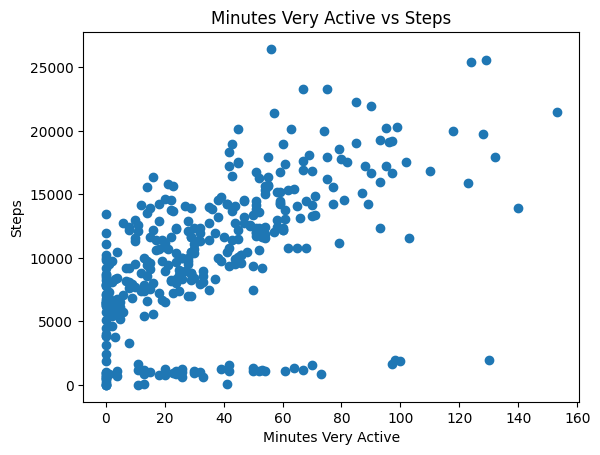

In [52]:
import matplotlib.pyplot as plt

plt.scatter(x=fitbit['Minutes Very Active'], y=fitbit['Steps'])
plt.xlabel('Minutes Very Active')
plt.ylabel('Steps')
plt.title('Minutes Very Active vs Steps')
plt.show()

#### What can you say about Minute Very Active and Steps? Write a comment below

In [58]:
# essas duas variaveis nao sao estritamentes perfeitas, pois os pontos sao dispersos o que indica que nao e uma relacao linear entre elas. Isso pode ser defido a n fatores...mas tem uma correlacao muito alta entre essas duas variaveis 0,57
correlation = fitbit['Minutes Very Active'].corr(fitbit['Steps'])
print(correlation)


0.5714518481062612


#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [57]:
correlation = fitbit['Minutes Sedentary'].corr(fitbit['Steps'])
print(correlation)

0.07690608062990098


#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

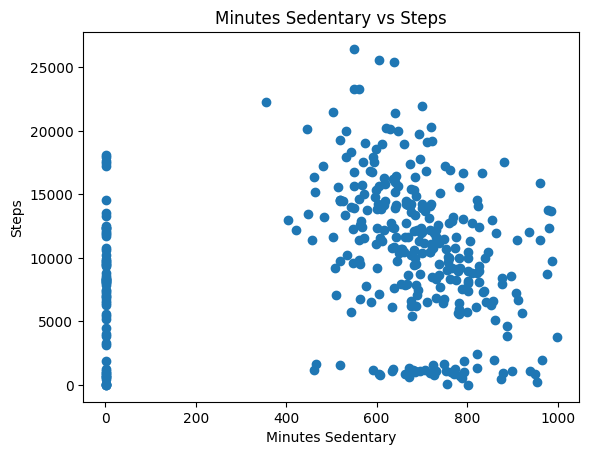

In [59]:
import matplotlib.pyplot as plt

plt.scatter(x=fitbit['Minutes Sedentary'], y=fitbit['Steps'])
plt.xlabel('Minutes Sedentary')
plt.ylabel('Steps')
plt.title('Minutes Sedentary vs Steps')
plt.show()

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [60]:
# horrivel, quase inexistente. Nao conseguiriamos associar essas duas variaveis dados que o coeficiente de correlacao é quase 0 :)


#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

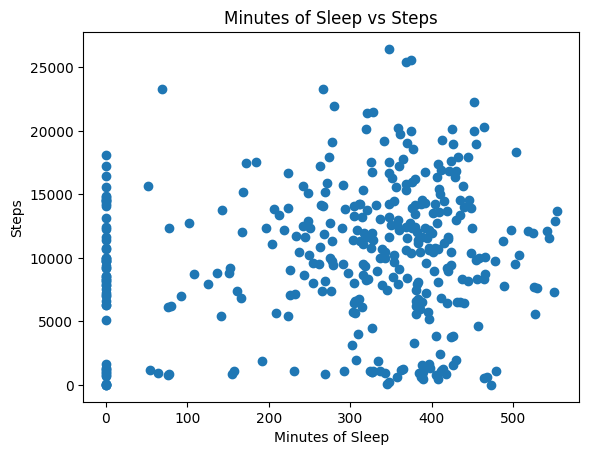

In [61]:
plt.scatter(x=fitbit['MinutesOfSleep'], y=fitbit['Steps'])
plt.xlabel('Minutes of Sleep')
plt.ylabel('Steps')
plt.title('Minutes of Sleep vs Steps')
plt.show()


#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [63]:
subset = fitbit[['Calorie burned', 'Steps', 'Floors', 'Minutes Sedentary', 'Minutes Very Active', 'MinutesOfSleep']]
cor_fit = subset.corr()
print(cor_fit)


                     Calorie burned     Steps    Floors  Minutes Sedentary   
Calorie burned             1.000000  0.255305  0.130757           0.125353  \
Steps                      0.255305  1.000000  0.306511           0.076906   
Floors                     0.130757  0.306511  1.000000           0.057812   
Minutes Sedentary          0.125353  0.076906  0.057812           1.000000   
Minutes Very Active        0.197881  0.571452  0.399503           0.105963   
MinutesOfSleep             0.011485  0.130986  0.069464           0.204242   

                     Minutes Very Active  MinutesOfSleep  
Calorie burned                  0.197881        0.011485  
Steps                           0.571452        0.130986  
Floors                          0.399503        0.069464  
Minutes Sedentary               0.105963        0.204242  
Minutes Very Active             1.000000        0.108018  
MinutesOfSleep                  0.108018        1.000000  


#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [65]:
steps_correlation = cor_fit['Steps'].sort_values(ascending=False)
print(steps_correlation)


Steps                  1.000000
Minutes Very Active    0.571452
Floors                 0.306511
Calorie burned         0.255305
MinutesOfSleep         0.130986
Minutes Sedentary      0.076906
Name: Steps, dtype: float64


# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`.

In [70]:

time_grades = pd.read_csv("Time_Grades.csv")
time_grades

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9
5,Eva,5,3
6,Carlos,12,7
7,Pedro,6,5
8,Ana,18,9
9,Gervasio,7,3


#### Show visually the frequency distribution of the time_grades dataset.

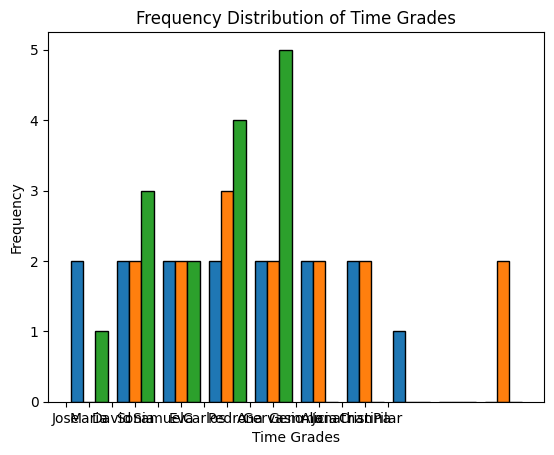

In [69]:
plt.hist(time_grades, bins=10, edgecolor='black')
plt.xlabel('Time Grades')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Time Grades')
plt.show()

#### Is there a correlation between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [81]:
import pandas as pd
from scipy.stats import pearsonr, spearmanr

pearson_corr, pearson_p_value = pearsonr(time_grades['Study time'], time_grades['Grade'])
spearman_corr, spearman_p_value = spearmanr(time_grades['Study time'],time_grades['Grade'])

print("Pearson correlation coefficient:", pearson_corr)
print("Pearson p-value:", pearson_p_value)
print("Spearman correlation coefficient:", spearman_corr)
print("Spearman p-value:", spearman_p_value)


Pearson correlation coefficient: 0.7980456073578858
Pearson p-value: 0.00036276352563427227
Spearman correlation coefficient: 0.819658753036942
Spearman p-value: 0.00018377469445788485


#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

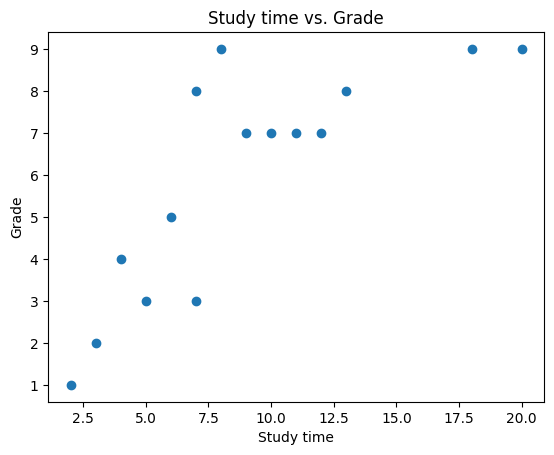

In [86]:
plt.scatter(time_grades['Study time'], time_grades['Grade'])
plt.xlabel('Study time')
plt.ylabel('Grade')
plt.title('Study time vs. Grade')
plt.show()

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

In [88]:
# Pearson é para variaveis lineares, enquanto Spearman nao tem uma correlacao linear.